In [29]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [39]:
netflix_overall = pd.read_csv('./netflix_titles.csv')

In [3]:
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Analysis of Movies vs TV Shows.

In [40]:
netflix_shows = netflix_overall[netflix_overall['type']=='TV Show']

In [41]:
netflix_movies = netflix_overall[netflix_overall['type']=='Movie']

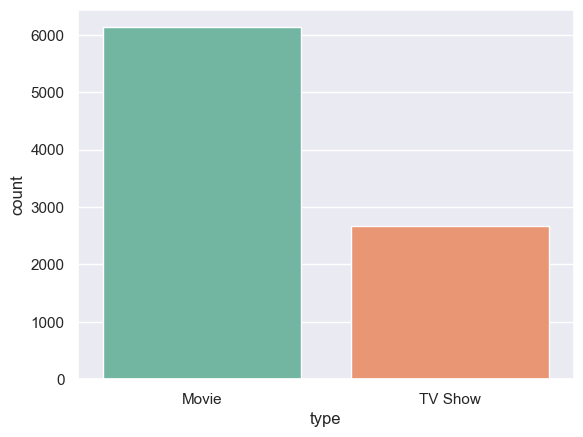

In [8]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix_overall, palette='Set2')

### If a producer wants to release some content, which month must he do so?
(Month when least amount of content is added)

In [16]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [17]:
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [18]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

In [25]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

In [27]:
df.head()

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0


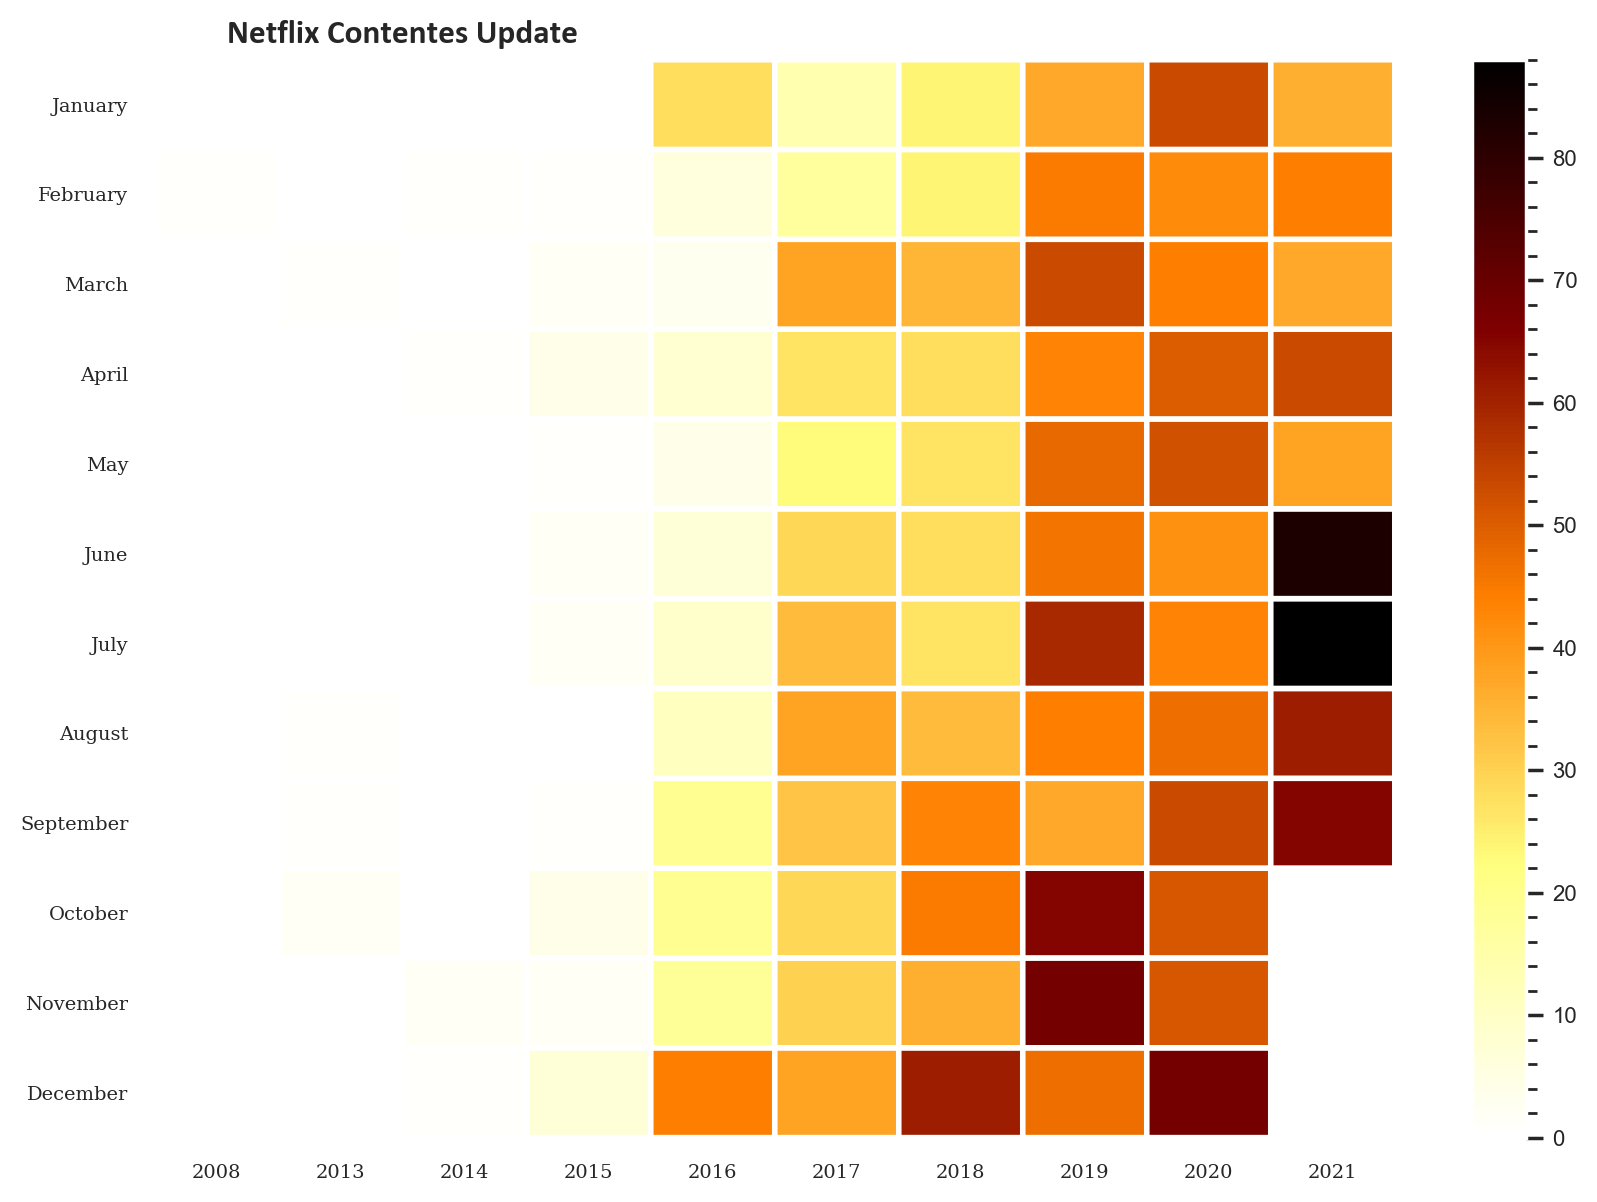

In [31]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contentes Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

### Moving rating analysis

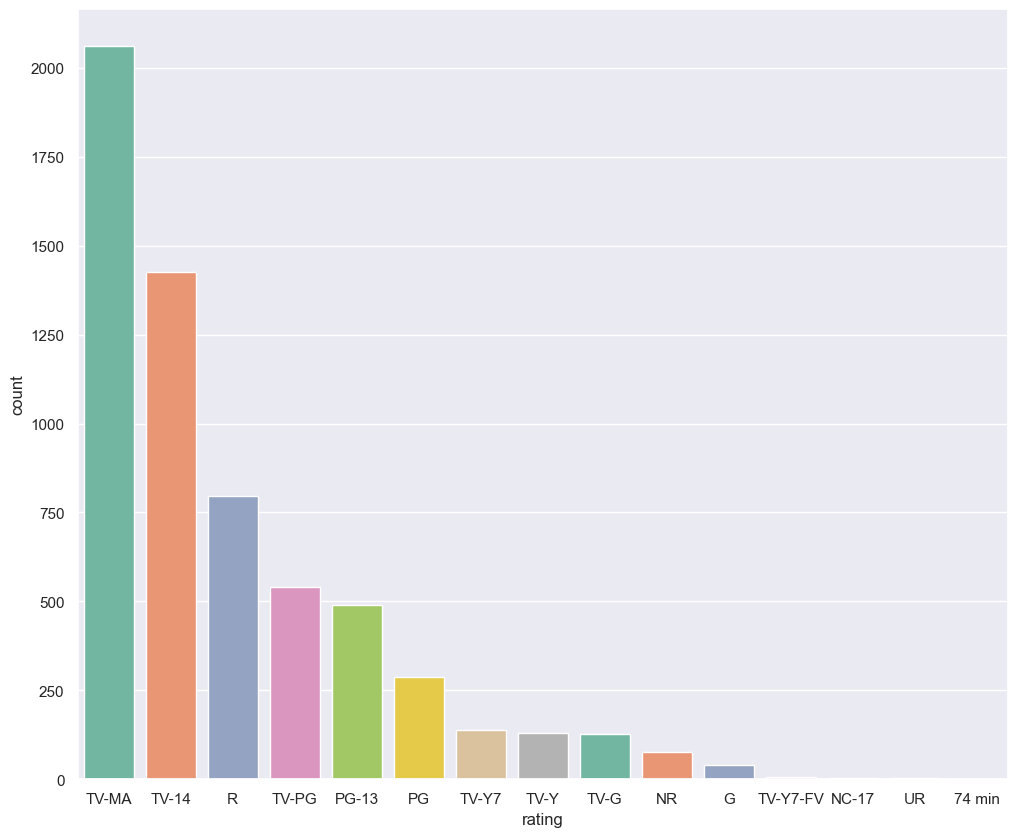

In [32]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data=netflix_movies, palette='Set2', order=netflix_movies['rating'].value_counts().index[0:15])

### Year wise analysis

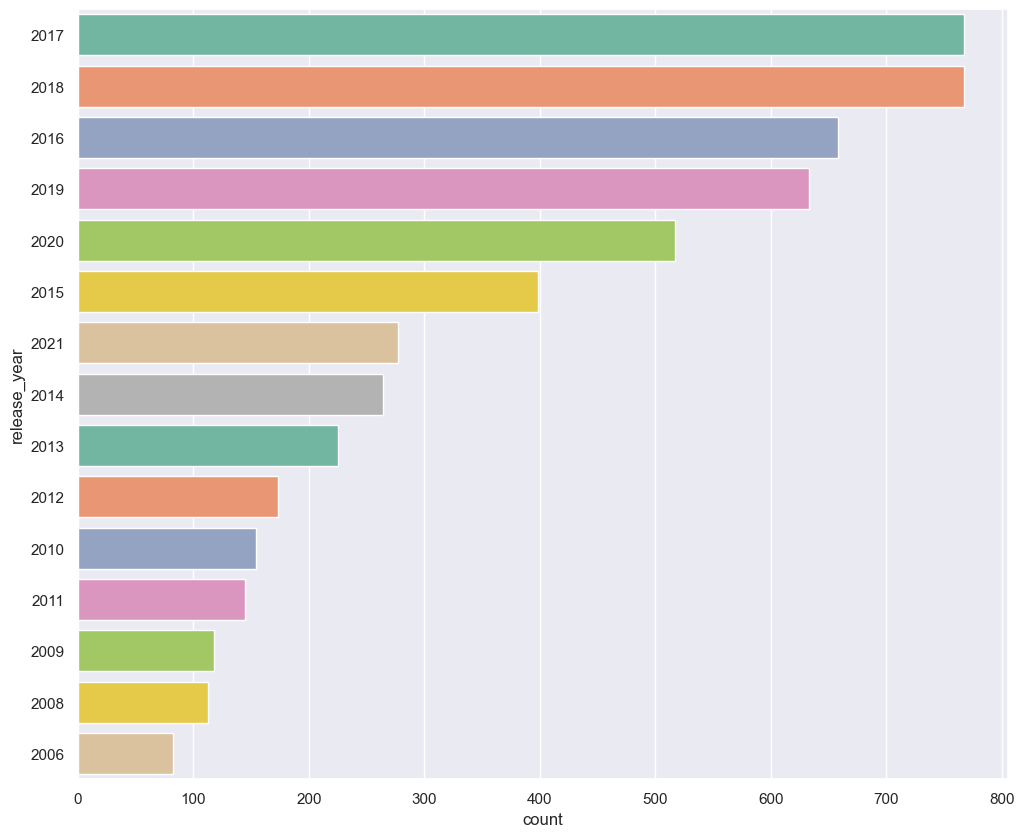

In [35]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])

### Analysis of duration of movies

In [ ]:
netflix_movies['duration'] = netflix_movies['duration'].fillna('0').str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

<AxesSubplot:xlabel='duration', ylabel='Density'>

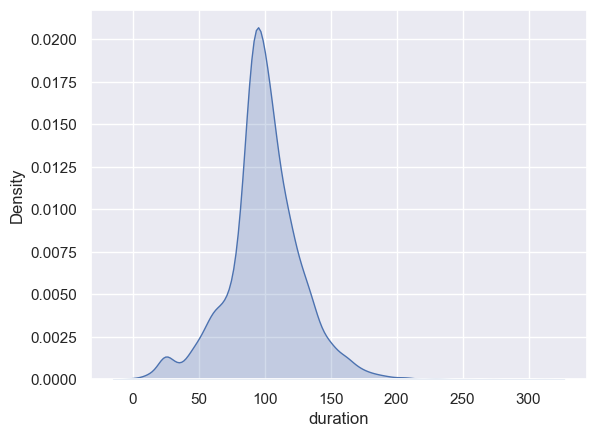

In [48]:
sns.set(style='darkgrid')
sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [55]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

In [58]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

C:\Users\geral\AppData\Local\Temp\ipykernel_4720\805313942.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


Text(0.5, 1.0, 'Genres')

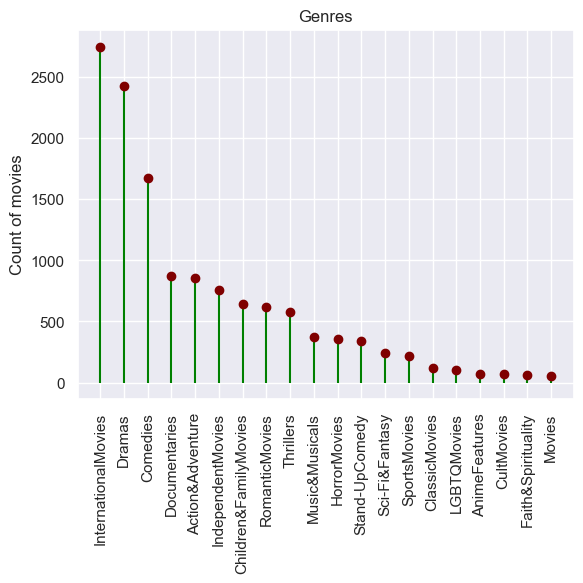

<Figure size 1000x1000 with 0 Axes>

In [64]:
fig, ax = plt.subplots()

fig = plt.figure(figsize=(10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x, y, 'o', color='maroon')
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel('Count of movies')
ax.set_title('Genres')